# EDA module

## 1. Diagnosis and DIA (Data Inspection Assistant)

If you cannot import this module, please try: pip install "polars_ds[plot]"

The dataset used for dependency detection can be found on github, at examples/dependency.parquet

The plots cannot be rendered on github. Currently, the plot backend is Altair but this is subject
to change depending on which plotting backend supports Polars more natively.

In [1]:
import altair as alt # the plotting package used by PDS
# For display on github. You don't need to do this when testing locally
# alt.renderers.enable("svg")
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
import polars as pl
import polars_ds as pds
from polars_ds.eda.diagnosis import DIA

In [3]:
df = pds.frame(size=1_000_000).select(
    pds.random(0.0, 12.0).alias("uniform_1"),
    pds.random(0.0, 1.0).alias("uniform_2"),
    pds.random_exp(0.5).alias("exp"),
    pds.random_normal(0.0, 1.0).alias("normal"),
    pds.random_normal(0.0, 1000.0).alias("fat_normal"),
).with_columns(
    pl.concat_list("uniform_2", 1 - pl.col("uniform_2")).alias("list_prob")
)
df.head()

uniform_1,uniform_2,exp,normal,fat_normal,list_prob
f64,f64,f64,f64,f64,list[f64]
2.069826,0.661982,2.096962,0.14336,732.266806,"[0.661982, 0.338018]"
3.858866,0.47717,3.788368,0.365989,328.55525,"[0.47717, 0.52283]"
4.543067,0.833987,0.044434,0.363597,-420.868485,"[0.833987, 0.166013]"
0.332198,0.820023,0.285355,-0.301353,-1119.381536,"[0.820023, 0.179977]"
1.015853,0.36208,0.284957,-0.266154,780.732621,"[0.36208, 0.63792]"


In [4]:
dia = DIA(df)

In [5]:
dia.special_values_report()

column,null_count,null%,NaN_count,NaN%,inf_count,Inf%
str,u32,f64,u32,f64,u32,f64
"""uniform_1""",0,0.0,0,0.0,0,0.0
"""uniform_2""",0,0.0,0,0.0,0,0.0
"""exp""",0,0.0,0,0.0,0,0.0
"""normal""",0,0.0,0,0.0,0,0.0
"""fat_normal""",0,0.0,0,0.0,0,0.0


In [6]:
# Only shows for numerical columns
dia.numeric_profile(histogram=True)

GT(_tbl_data=shape: (5, 13)
┌────────────┬────────────┬───────┬───────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null% ┆ mean      ┆ … ┆ max        ┆ IQR       ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---   ┆ ---       ┆   ┆ ---        ┆ ---       ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64   ┆ f64       ┆   ┆ f64        ┆ f64       ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆       ┆           ┆   ┆            ┆           ┆ u32       ┆           │
╞════════════╪════════════╪═══════╪═══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ uniform_1  ┆ 1000000    ┆ 0.0   ┆ 5.995845  ┆ … ┆ 11.999998  ┆ 6.008245  ┆ 0         ┆ {[49793,  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 50521, …  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 49718]}   │
│ uniform_2  ┆ 1000000    ┆ 0.0   ┆ 0.500014  ┆ … ┆ 0.999995   ┆ 0.500023  ┆ 0         ┆ {[49909,  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 50144, …  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 50057]}   │
│ exp        ┆ 1000000    ┆ 0.0   ┆ 1.998414  ┆ … ┆ 32.349975  ┆ 2.196868  ┆ 48001     ┆ {[555208, │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 246340, … │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 1]}       │
│ normal     ┆ 1000000    ┆ 0.0   ┆ -0.000045 ┆ … ┆ 4.904656   ┆ 1.350057  ┆ 6973      ┆ {[4, 27,  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ … 6]}     │
│ fat_normal ┆ 1000000    ┆ 0.0   ┆ -0.871161 ┆ … ┆ 4795.70089 ┆ 1349.6646 ┆ 6842      ┆ {[6, 50,  │
│            ┆            ┆       ┆           ┆   ┆ 5          ┆ 51        ┆           ┆ … 7]}     │
└────────────┴────────────┴───────┴───────────┴───┴────────────┴───────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x7700b7317380>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnum.default: 1>, column_label='q1', column_align='right', column_width=None), ColInfo(var='median', type=<ColInfoTypeEnum.default: 1>, column_label='median', column_align='right', column_width=None), ColInfo(var='q3', type=<ColInfoTypeEnum.default: 1>, column_label='q3', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None), ColInfo(var='IQR', type=<ColInfoTypeEnum.default: 1>, column_label='IQR', column_align='right', column_width=None), ColInfo(var='outlier_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='outlier_cnt', column_align='center', column_width=None), ColInfo(var='histogram', type=<ColInfoTypeEnum.default: 1>, column_label='histogram', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7700b73170e0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7700b7317770>, _formats=[<great_tables._gt

In [7]:
# Don't compute histogram. Use Polars as output format instead of GT
dia.numeric_profile(histogram=False, gt=False) 

column,non_null_cnt,null%,mean,std,min,q1,median,q3,max,IQR,outlier_cnt
str,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
"""uniform_1""",1000000,0.0,5.995845,3.464319,0.000007,2.991631,5.99,8.999876,11.999998,6.008245,0
"""uniform_2""",1000000,0.0,0.500014,0.288716,7.2063e-7,0.250181,0.5,0.750205,0.999995,0.500023,0
"""exp""",1000000,0.0,1.998414,2.001095,0.000007,0.574336,1.38,2.771204,32.349975,2.196868,48001
"""normal""",1000000,0.0,-0.000045,1.000812,-4.998318,-0.673997,-0.0,0.67606,4.904656,1.350057,6973
"""fat_normal""",1000000,0.0,-0.871161,999.734607,-4863.700292,-675.802238,-1.33,673.862413,4795.700895,1349.664651,6842


In [8]:
print(dia.infer_corr())
print(dia.infer_corr(method = "kendall"))
print(dia.infer_corr(method = "spearman"))

shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ normal    ┆ fat_normal ┆ -0.001702 │
│ exp       ┆ normal     ┆ 0.001655  │
│ exp       ┆ fat_normal ┆ 0.001354  │
│ uniform_1 ┆ uniform_2  ┆ -0.001071 │
│ uniform_1 ┆ exp        ┆ 0.000714  │
│ uniform_2 ┆ normal     ┆ -0.000279 │
│ uniform_2 ┆ exp        ┆ -0.000248 │
│ uniform_2 ┆ fat_normal ┆ 0.000214  │
│ uniform_1 ┆ normal     ┆ -0.000158 │
│ uniform_1 ┆ fat_normal ┆ -0.00013  │
└───────────┴────────────┴───────────┘
shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ exp       ┆ normal     ┆ 0.001206  │
│ exp       ┆ fat_normal ┆ 0.001096  │
│ normal    ┆ fat_normal ┆ -0.000954 │
│ uniform_1 ┆ uniform_2  ┆ -0.0007

In [9]:
dia.meta()

{'numerics': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'ints': [],
 'floats': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'strs': [],
 'bools': [],
 'cats': [],
 'list_floats': ['list_prob'],
 'list_bool': [],
 'list_str': [],
 'list_ints': [],
 'simple_types': ['uniform_1',
  'uniform_2',
  'exp',
  'normal',
  'fat_normal',
  'list_prob'],
 'other_types': []}

In [10]:
# Uniform_2 can potentially be a probability score column (e.g. output of predict_proba, but taking values only for class =1)
# list_prob can potentially be a 2-class probability column (e.g. output of predict_proba)
dia.infer_prob()

['uniform_2', 'list_prob']

# Data Validation, Dependency Detection, Distribution Comparisons

Does the columns match our expectations?

Does knowing values in column A tell us values in column B?

In [11]:
df = pl.read_parquet("dependency.parquet")
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [12]:
df.shape

(69713, 22)

In [13]:
dia = DIA(df)

In [14]:
df.filter(
    pl.col("EMI").is_between(0, 900, closed="both")
)

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPP50632654511""","""Male""","""24/08/83""","""09/07/16""","""C10030""","""B""","""COM0002632""","""B""",4,2700.0,"""B003""","""G""","""Y""","""S133""","""B""",460.0,20000,5,18.0,508,7,0
"""APPS60734495841""","""Male""","""11/12/86""","""08/07/16""","""C10032""","""C""","""COM0019508""","""C""",4,2899.4,"""B006""","""P""","""Y""","""S122""","""E""",255.0,30000,5,15.5,722,0,0
"""APPJ30117254546""","""Male""","""05/09/86""","""01/07/16""","""C10003""","""A""","""COM0032570""","""B""",4,2100.0,"""B001""","""P""","""Y""","""S122""","""B""",133.3,20000,4,20.0,609,4,0
"""APPZ60863399134""","""Male""","""10/12/75""","""01/07/16""","""C10003""","""A""","""COM0000090""","""C""",3,4000.0,"""B002""","""P""","""Y""","""S133""","""B""",446.5,5000,5,14.85,119,10,0
"""APPB20614524311""","""Male""","""26/03/87""","""01/07/16""","""C10003""","""A""","""COM0011908""","""A""",4,3000.0,"""B004""","""P""","""Y""","""S122""","""B""",0.0,5000,3,31.0,215,7,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""APPG30032778635""","""Male""","""15/10/67""","""30/09/16""","""C10001""","""A""","""COM0033268""","""A""",4,8000.0,"""B004""","""P""","""Y""","""S122""","""G""",0.0,10000,2,14.85,484,10,0
"""APPH40392886743""","""Male""","""05/08/82""","""30/09/16""","""C10002""","""A""","""COM0000516""","""A""",4,5516.0,"""B011""","""P""","""Y""","""S122""","""G""",754.7,35000,5,13.99,814,10,0
"""APPJ50427419932""","""Female""","""29/11/91""","""30/09/16""","""C10213""","""C""","""COM0005617""","""A""",4,1300.0,"""B009""","""G""","""Y""","""S122""","""G""",170.0,10000,2,37.0,596,2,0


In [15]:
# Simple Validation
rules = [
    (pl.col("ID").is_not_null(), "ID NULL"),
    (pl.col("EMI").is_between(0, 900, closed="both"), "EMI outside 0-900"),
    (pl.col("Monthly_Income") <= 9999, "income>9999"),
    (pl.col("Existing_EMI").round() == pl.col("Existing_EMI"), "Existing_EMI not integer"),
    (pl.col("Employer_Category1").is_in(["A", "B", "C"]), "Employer_Category1 not in ('A', 'B', 'C')"),
]

report = dia.validation_report(
    *rules
    , id_col = "ID"
    , columns_to_keep = ["EMI", "Monthly_Income"]
)

report.head()

ID,EMI,Monthly_Income,__reason__
str,i64,f64,str
"""APPD40611263344""",953,3500.0,"""EMI outside 0-900"""
"""APPG60994436641""",null,10000.0,"""income>9999"""
"""APPK80327232033""",3082,7500.0,"""EMI outside 0-900"""
"""APPL20820172146""",1088,3000.0,"""EMI outside 0-900"""
"""APPM30977401211""",1749,2500.0,"""EMI outside 0-900"""


In [16]:
report.group_by("__reason__").agg(
    count = pl.len()
).sort("__reason__")

__reason__,count
str,u32
"""EMI outside 0-900""",12001
"""Existing_EMI not integer""",2995
"""income>9999""",2467


In [17]:
# Report will all violations for the same row
from polars_ds.eda.diagnosis import DIA
dia = DIA(df)

rules = [
    (pl.col("ID").is_not_null(), "ID NULL"),
    (pl.col("EMI").is_between(0, 900, closed="both"), "EMI outside 0-900"),
    (pl.col("Monthly_Income") <= 9999, "income>9999"),
    (pl.col("Existing_EMI").round() == pl.col("Existing_EMI"), "Existing_EMI not integer"),
    (pl.col("Employer_Category1").is_in(["A", "B", "C"]), "Employer_Category1 not in ('A', 'B', 'C')"),
]

report2 = dia.validation_report(
    *rules
    , id_col = "ID"
    , columns_to_keep = ["EMI", "Monthly_Income"]
    , all_reasons = True
)

report2.head()

ID,EMI,Monthly_Income,__reason__
str,i64,f64,list[str]
"""APPD40611263344""",953,3500.0,"[""EMI outside 0-900""]"
"""APPG60994436641""",null,10000.0,"[""EMI outside 0-900"", ""income>9999""]"
"""APPK80327232033""",3082,7500.0,"[""EMI outside 0-900""]"
"""APPL20820172146""",1088,3000.0,"[""EMI outside 0-900""]"
"""APPM30977401211""",1749,2500.0,"[""EMI outside 0-900""]"


In [18]:
dia.infer_dependency()

/tmp/ipykernel_13021/3037619369.py:1: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dia.infer_dependency()


column,by,cond_entropy
str,str,f64
"""Gender""","""ID""",0.0
"""Contacted""","""ID""",0.0
"""Approved""","""ID""",0.0
"""Primary_Bank_Type""","""Customer_Existing_Primary_Bank…",0.0
"""Primary_Bank_Type""","""ID""",0.0
…,…,…
"""Loan_Amount""","""City_Code""",2.702889
"""City_Code""","""EMI""",3.147327
"""Lead_Creation_Date""","""EMI""",3.92818


/home/tq/Projects/polars_ds_extension/python/polars_ds/eda/diagnosis.py:767: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


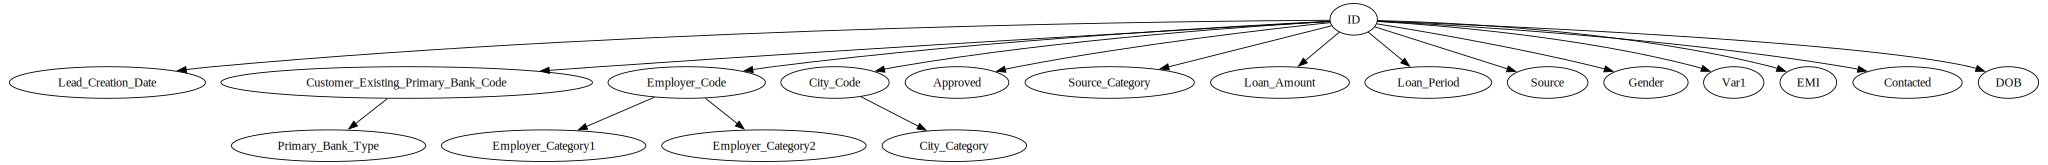

In [19]:
dia.plot_dependency()

/home/tq/Projects/polars_ds_extension/python/polars_ds/eda/diagnosis.py:767: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


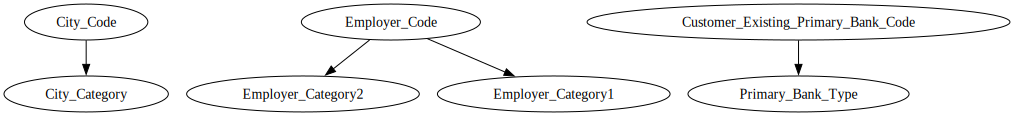

In [20]:
# ID implies everything, of course, because ID is unique.
# So let's not plot it
dia.plot_dependency(subset=pl.all().exclude("ID"))

In [21]:
# Basic stats about string columns
dia.str_stats()

column,null_count,n_unique,most_freq,most_freq_cnt,min_byte_len,min_char_len,avg_byte_len,avg_char_len,max_byte_len,max_char_len,5p_byte_len,95p_byte_len
str,u32,u32,str,u32,u32,u32,f64,f64,u32,u32,f64,f64
"""ID""",0,69713,"""APPC90493171225""",1,15,15,15.0,15.0,15,15,15.0,15.0
"""Gender""",0,2,"""Male""",39949,4,4,4.853901,4.853901,6,6,4.0,6.0
"""DOB""",15,10760,"""11/01/82""",253,8,8,8.0,8.0,8,8,8.0,8.0
"""Lead_Creation_Date""",0,92,"""02/09/16""",1838,8,8,8.0,8.0,8,8,8.0,8.0
"""City_Code""",814,679,"""C10001""",10007,6,6,6.0,6.0,6,6,6.0,6.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""Customer_Existing_Primary_Bank…",9391,58,"""B001""",14197,4,4,4.0,4.0,4,4,4.0,4.0
"""Primary_Bank_Type""",9391,3,"""P""",39619,1,1,1.0,1.0,1,1,1.0,1.0
"""Contacted""",0,2,"""Y""",45275,1,1,1.0,1.0,1,1,1.0,1.0


# Correlation, Null Correlation, Feature Distribution

In [22]:
df = pl.read_parquet("dependency.parquet")
df.head()

dia = DIA(df)
dia.numeric_profile(iqr_multiplier=2)

GT(_tbl_data=shape: (9, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬──────────┬─────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null%    ┆ mean       ┆ … ┆ max      ┆ IQR     ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---      ┆ ---        ┆   ┆ ---      ┆ ---     ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64      ┆ f64        ┆   ┆ f64      ┆ f64     ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆          ┆            ┆   ┆          ┆         ┆ u32       ┆           │
╞════════════╪════════════╪══════════╪════════════╪═══╪══════════╪═════════╪═══════════╪═══════════╡
│ Employer_C ┆ 65415      ┆ 0.061653 ┆ 3.720187   ┆ … ┆ 4.0      ┆ 0.0     ┆ 7833      ┆ {[4258,   │
│ ategory2   ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1955, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 57582]}   │
│ Monthly_In ┆ 69713      ┆ 0.0      ┆ 5622.2832  ┆ … ┆ 3.8384e7 ┆ 2350.0  ┆ 3920      ┆ {[69699,  │
│ come       ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Existing_E ┆ 69662      ┆ 0.000732 ┆ 360.928751 ┆ … ┆ 545436.5 ┆ 350.0   ┆ 6549      ┆ {[69655,  │
│ MI         ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Loan_Amoun ┆ 42004      ┆ 0.397472 ┆ 39429.9828 ┆ … ┆ 300000.0 ┆ 30000.0 ┆ 1547      ┆ {[8646,   │
│ t          ┆            ┆          ┆ 59         ┆   ┆          ┆         ┆           ┆ 15019, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4]}       │
│ Loan_Perio ┆ 42004      ┆ 0.397472 ┆ 3.890629   ┆ … ┆ 6.0      ┆ 2.0     ┆ 0         ┆ {[1886,   │
│ d          ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4266, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1]}       │
│ Interest_R ┆ 22276      ┆ 0.680461 ┆ 19.21357   ┆ … ┆ 37.0     ┆ 4.75    ┆ 2378      ┆ {[758,    │
│ ate        ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2752, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 240]}     │
│ EMI        ┆ 22276      ┆ 0.680461 ┆ 1101.46624 ┆ … ┆ 13556.0  ┆ 646.0   ┆ 1081      ┆ {[8179,   │
│            ┆            ┆          ┆ 2          ┆   ┆          ┆         ┆           ┆ 9889, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2]}       │
│ Var1       ┆ 69713      ┆ 0.0      ┆ 3.948446   ┆ … ┆ 10.0     ┆ 7.0     ┆ 0         ┆ {[23308,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13363, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13420]}   │
│ Approved   ┆ 69713      ┆ 0.0      ┆ 0.014631   ┆ … ┆ 1.0      ┆ 0.0     ┆ 1020      ┆ {[68693,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1020]}    │
└────────────┴────────────┴──────────┴────────────┴───┴──────────┴─────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x77004ec57de0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnu

In [23]:
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [24]:
import polars.selectors as cs

dia.corr(subset=["Monthly_Income", "Existing_EMI"])

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Monthly_Income""",0.001546,1.0,0.245826,0.039998,-0.003671,-0.014789,0.035163,0.024854,0.000472
"""Existing_EMI""",-0.017074,0.245826,1.0,0.008653,-0.004603,-0.023001,0.000813,0.00662,0.027821


In [25]:
dia.corr(subset=cs.all(), method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ID""",-0.001344,0.002872,-0.001846,0.002515,-0.00461,0.003937,0.000144,0.001832,-0.002095
"""Gender""",-0.041901,0.198756,-0.143366,-0.012385,0.04055,-0.010801,0.010427,0.5331,0.045283
"""DOB""",-0.005417,0.005234,-0.002514,0.004804,0.006114,0.000492,0.005204,-0.000032,-0.002547
"""Lead_Creation_Date""",0.002868,0.006615,0.00987,0.001086,-0.079301,0.014667,-0.014768,0.039963,-0.005199
"""City_Code""",0.065158,-0.092007,0.039832,-0.024716,0.06091,0.144521,0.059781,0.030293,-0.028195
…,…,…,…,…,…,…,…,…,…
"""Loan_Period""",-0.015674,0.020818,-0.074173,0.491637,1.0,-0.059534,0.145961,-0.009532,-0.000028
"""Interest_Rate""",0.242253,-0.662215,-0.040708,-0.3561,-0.059534,1.0,-0.284007,-0.620129,-0.12408
"""EMI""",-0.068692,0.480323,-0.296146,0.889693,0.145961,-0.284007,1.0,0.2934,0.040533


In [26]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,−0.110,1.000,0.171,0.481,0.021,−0.662,0.480,0.673,0.120
Existing_EMI,0.035,0.171,1.000,−0.225,−0.074,−0.041,−0.296,−0.015,0.057


In [27]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="xi")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,0.373,1.000,0.109,0.708,0.654,0.897,0.870,0.486,0.027
Existing_EMI,0.389,0.116,1.000,0.707,0.697,0.868,0.874,0.046,0.009


In [28]:
# Correlation between A is null and B is null for A, B combinations in the subset
dia.null_corr(subset = pl.all()).filter(
    pl.col("null_corr").abs() > 0.7
)

column_1,column_2,null_corr
str,str,f64
"""City_Code""","""City_Category""",1.0
"""Employer_Code""","""Employer_Category1""",1.0
"""Customer_Existing_Primary_Bank…","""Primary_Bank_Type""",1.0
"""Loan_Amount""","""Loan_Period""",1.0
"""Interest_Rate""","""EMI""",1.0
"""Employer_Code""","""Employer_Category2""",0.964816
"""Employer_Category1""","""Employer_Category2""",0.964816


In [29]:
# Plot a single feature's distribution, together with useful stats
plot = dia.plot_feature_distr(
    "EMI", 
    n_bins=100, 
    density=False, 
)
plot # .interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [30]:
# You can provide a filter expression, which will be applied upfront
# You can see how because of this filter expression, null and extreme values are removed
plot = dia.plot_feature_distr(
    "EMI", 
    n_bins=100, 
    density=False, 
    min_ = pl.col("EMI").quantile(0.05),
    max_ = pl.col("EMI").quantile(0.95),
)
plot

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [31]:
dia.plot_feature_distr(
    "EMI", 
    n_bins=100,  
    over = "Primary_Bank_Type"
).properties(
    title = alt.Title("Distribution of EMI over Primary Bank Type")
) # .interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


# ML + ML Metrics Plots 

Example: Classic Iris Dataset

In [32]:
import polars as pl
import polars_ds as pds
import altair as alt
# Only used to get dataset.
from sklearn import datasets

dataset = datasets.load_iris()
df = pl.from_numpy(dataset.data, schema = dataset.feature_names).with_columns(
    pl.Series(values=dataset.target).alias("species")
).with_columns(
    pl.when(pl.col("species") == 0).then(pl.lit('setosa'))
    .when(pl.col("species") == 1).then(pl.lit('versicolor'))
    .when(pl.col("species") == 2).then(pl.lit('virginica')).alias("species")
)
df.head()

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""


In [33]:
import polars_ds.eda.plots as pp

In [34]:
pp.plot_pca(
    df,
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], 
    by = "species",
    dim = 2
).properties(
    title='2 Principal Components Plot'
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [35]:
# Just for fun, let's see if there is any linear relationship between sepal length and petal length
plot = pp.plot_lin_reg(
    df,
    x = "sepal length (cm)", 
    target = "petal length (cm)", 
    add_bias=True,
    show_lin_reg_eq=True # Prints out the linear regression result at the end
).properties(
    title = "Linear Regression Chart"
)
plot.interactive()


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [36]:
df = pl.DataFrame({
    "actual": [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    "pred": [0.1, 0.4, 0.35, 0.8, 0.6, 0.23, 0.4, 0.23, 0.1, 0.9, 0.5, 0.56],
    "pred2": [0.1, 0.3, 0.2, 0.9, 0.55, 0.25, 0.23, 0.66, 0.78, 0.21, 0.4, 0.98]
}).with_columns(
    pred3 = 1 - pl.col("pred2")
)

In [37]:
pp.plot_roc_auc(
    df = df, 
    actual = "actual",
    pred = "pred",
    estimator_name = "My Model",
    color = "#fc0335",
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [38]:
# You may combine multiple ROC AUC plots like this
# This magic works because this is an Altair plot
combined = pp.plot_roc_auc(
    df = df, 
    actual = "actual",
    pred = "pred",
    n_decimals = 4,
    estimator_name = "My Model",
    color = "#fc0335",
    text_color = "#fc0335",
    opacity = 0.5
) + pp.plot_roc_auc(
    df = df, 
    actual = "actual",
    pred = "pred2",
    n_decimals = 4,
    estimator_name = "My Model2",
    auc_y_offset = -15,
    color = "#0db81b",
    text_color = "#0db81b",
    opacity = 0.5
) + pp.plot_roc_auc(
    df = df, 
    actual = "actual",
    pred = "pred3",
    n_decimals = 4,
    estimator_name = "My Model3",
    auc_y_offset = -30,
    color = "#9e337a",
    text_color = "#9e337a",
    opacity = 0.5
)

combined.properties(
    title='ROC AUC Comparison'
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


# Plots For Each Partition/Group/Segment/Category

The PartitionHelper class can be used. Using the class is not necessary, but it simplifies the code and tries to catch common errors when it comes to partitions, and is recommended for beginners. 

If you are familiar with polars's partition function, you don't have to use this. 

## Linear Regression Plot on Species

In [39]:
import polars as pl
import polars_ds as pds
import altair as alt
# Only used to get dataset.
from sklearn import datasets

dataset = datasets.load_iris()
df = pl.from_numpy(dataset.data, schema = dataset.feature_names).with_columns(
    pl.Series(values=dataset.target).alias("species")
).with_columns(
    pl.when(pl.col("species") == 0).then(pl.lit('setosa'))
    .when(pl.col("species") == 1).then(pl.lit('versicolor'))
    .when(pl.col("species") == 2).then(pl.lit('virginica')).alias("species")
)
df.head()

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""


In [40]:
from polars_ds.partition import PartitionHelper

by = "species"
parts = PartitionHelper(df, by)
plots = parts.apply(
    lambda p_name, sub_df: pp.plot_lin_reg(
        sub_df,
        x = "sepal length (cm)", 
        target = "petal length (cm)", 
        add_bias = True,
        weights = None,
        max_points = 2000,
    ).properties(
        title = f"Linear Regression Chart on Species = {p_name}"
    )
)

print(plots)
alt.vconcat(*plots.values()).configure(autosize="pad")

{'setosa': alt.LayerChart(...), 'versicolor': alt.LayerChart(...), 'virginica': alt.LayerChart(...)}


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [41]:
parts.names()

['setosa', 'versicolor', 'virginica']

In [42]:
parts.get("virginica").head()

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
f64,f64,f64,f64,str
6.3,3.3,6.0,2.5,"""virginica"""
5.8,2.7,5.1,1.9,"""virginica"""
7.1,3.0,5.9,2.1,"""virginica"""
6.3,2.9,5.6,1.8,"""virginica"""
6.5,3.0,5.8,2.2,"""virginica"""


## ROC AUC Plot on Categories

In [43]:
df = pl.DataFrame({
    "actual": [0, 0, 1, 1, 1, 0],
    "pred": [0.1, 0.4, 0.35, 0.8, 0.6, 0.23],
    "category": ["a", "a", "a", "b", "b", "b"]
})

In [44]:
from polars_ds.partition import PartitionHelper

plots = PartitionHelper(df, by = "category").apply(
    lambda p_name, sub_df: pp.plot_roc_auc(
        df = sub_df, 
        actual = "actual",
        pred = "pred",
        estimator_name = "My Model"
    ).properties(
        title = f"ROC AUC on {p_name}"
    )
)

alt.vconcat(*plots.values()).configure(autosize="pad")

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
